In [1]:
import os
import glob
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the data directories
train_dir = 'C:/Users/Admin/Desktop/G6SM/Data/train'
test_dir = 'C:/Users/Admin/Desktop/G6SM/Data/test'

# Load the training data
train_data = []
train_labels = []
label_mapping = {}
label_index = 0
for emotion_dir in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion_dir)
    for img_path in glob.glob(os.path.join(emotion_path, '*.png')):
        img = Image.open(img_path)
        train_data.append(np.array(img))
        if emotion_dir not in label_mapping:
            label_mapping[emotion_dir] = label_index
            label_index += 1
        train_labels.append(label_mapping[emotion_dir])

# Load the test data
test_data = []
test_labels = []
for emotion_dir in os.listdir(test_dir):
    emotion_path = os.path.join(test_dir, emotion_dir)
    for img_path in glob.glob(os.path.join(emotion_path, '*.png')):
        img = Image.open(img_path)
        test_data.append(np.array(img))
        test_labels.append(label_mapping[emotion_dir])

# Convert the data and labels to NumPy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Normalize the pixel values
train_data = train_data / 255.0
test_data = test_data / 255.0

In [3]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Convert the labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical

num_classes = 7
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Training the model and assigning the history object
history = model.fit(train_data, train_labels, epochs=50, batch_size=32,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping, lr_reducer])


Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3082 - loss: 1.7084 - val_accuracy: 0.4465 - val_loss: 1.4456 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4633 - loss: 1.4006 - val_accuracy: 0.4850 - val_loss: 1.3409 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5200 - loss: 1.2673 - val_accuracy: 0.5109 - val_loss: 1.2797 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5562 - loss: 1.1674 - val_accuracy: 0.5081 - val_loss: 1.2892 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5899 - loss: 1.0972 - val_accuracy: 0.5267 - val_loss: 1.2481 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6255 - loss: 1.0127 - val_accuracy: 0.5191 - val_loss: 1.2910 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6580 - loss: 0.9213 - 

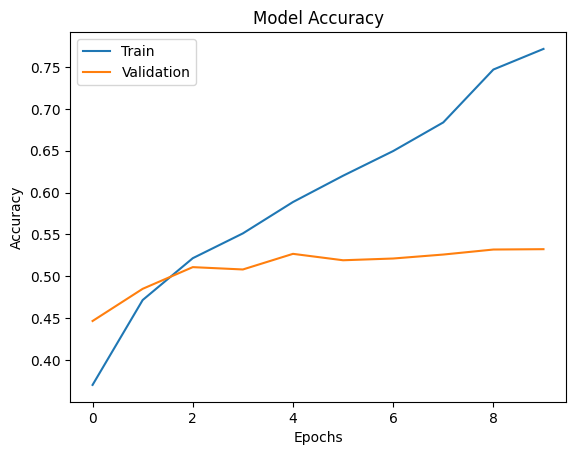

In [6]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

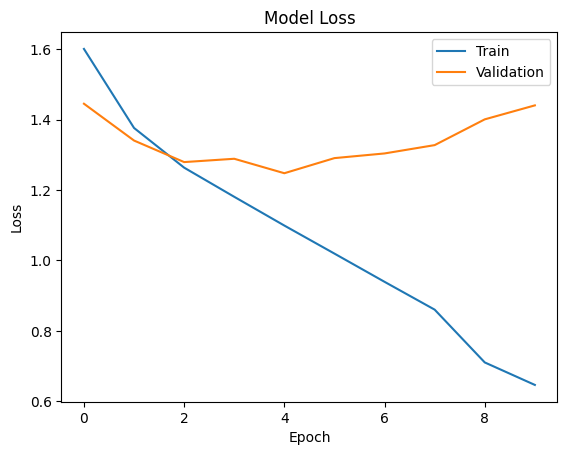

In [9]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Calculate additional evaluation metrics
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)

precision = precision_score(test_labels_classes, y_pred_classes, average='macro')
recall = recall_score(test_labels_classes, y_pred_classes, average='macro')
f1 = f1_score(test_labels_classes, y_pred_classes, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4974 - loss: 1.5251
Test Loss: 1.4409468173980713
Test Accuracy: 0.5323209762573242
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.5270101178656044
Recall: 0.4938304936570848
F1-score: 0.5059635441508996


In [ ]:
# Save the trained model
model.save('emotion_detection_model.h5')